In [6]:
!{sys.executable} -m pip install -U tf-nightly-gpu

     |████████████████████████████████| 516.1 MB 22.1 MB/s eta 0:00:01    |█▊                              | 28.5 MB 27.1 MB/s eta 0:00:18     |███▊                            | 59.3 MB 22.4 MB/s eta 0:00:21     |████▍                           | 70.0 MB 22.4 MB/s eta 0:00:20     |████▍                           | 71.3 MB 22.4 MB/s eta 0:00:20     |█████▊                          | 92.6 MB 26.6 MB/s eta 0:00:16     |███████▉                        | 127.0 MB 15.5 MB/s eta 0:00:26     |████████████                    | 194.4 MB 25.5 MB/s eta 0:00:13     |████████████████                | 257.0 MB 12.3 MB/s eta 0:00:22��▎               | 262.1 MB 12.3 MB/s eta 0:00:21     |████████████████▋               | 268.2 MB 36.4 MB/s eta 0:00:07     |██████████████████              | 291.1 MB 6.7 MB/s eta 0:00:34     |███████████████████▍            | 312.5 MB 27.6 MB/s eta 0:00:08     |████████████████████▌           | 330.6 MB 6.2 MB/s eta 0:00:30     |█████████████████████▎          | 343.9 MB

In [2]:
import sys
!{sys.executable} -m pip install ./src

Processing ./src
  Created wheel for ShAReD-Net: filename=ShAReD_Net-1.0-py3-none-any.whl size=38247 sha256=3d3f68c28295c08bf753015f114c5d264c1bad27bc2c8821e0a0567ccb08cf54
  Stored in directory: /tmp/pip-ephem-wheel-cache-5b4f0ptp/wheels/22/c3/70/c7c197844357b787f75a5309992d7aa6bb1d79ad298e7a9445
Successfully built ShAReD-Net
  Attempting uninstall: ShAReD-Net
    Found existing installation: ShAReD-Net 1.0
    Uninstalling ShAReD-Net-1.0:
      Successfully uninstalled ShAReD-Net-1.0


In [2]:
import tensorflow as tf
print(tf.version.VERSION)


2.2.0-dev20200325


In [5]:
devs = tf.config.get_visible_devices()
print(devs)

print(tf.config.threading.get_inter_op_parallelism_threads())
print(tf.config.threading.get_intra_op_parallelism_threads())
tf.config.threading.set_inter_op_parallelism_threads(12)
tf.config.threading.set_intra_op_parallelism_threads(12)
print(tf.config.threading.get_inter_op_parallelism_threads())
print(tf.config.threading.get_intra_op_parallelism_threads())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]
0
0
12
12


In [6]:

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus = gpus[1:] 
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus, 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


conv = tf.keras.layers.Conv2D(2,3)
conv(tf.zeros([1,3,3,2]))

3 Physical GPUs, 3 Logical GPUs


<tf.Tensor: shape=(1, 1, 1, 2), dtype=float32, numpy=array([[[[0., 0.]]]], dtype=float32)>

In [5]:
import ShAReD_Net.model.activation.base as activation_base
activation_base.main()

-8 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.00033535014>)
-7 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0009110512>)
-6 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.002472623>)
-5 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.006692851>)
-4 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.01798621>)
-3 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047425874>)
-2 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.25>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11920292>)
-1 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.375>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26894143>)
0 :  (<tf.Tensor: shape=(), dtype=float32, numpy=0.5>, <tf.Tensor: shape=(), dtype=float32,

MaskToROI (2, 20, 15)
tf.Tensor(
[[[ 0  3 12]
  [ 0  8 17]]

 [[ 0  6  2]
  [ 0 11  7]]

 [[ 0 16  8]
  [ 0 21 13]]

 [[ 1  3 12]
  [ 1  8 17]]

 [[ 1  6  2]
  [ 1 11  7]]], shape=(5, 2, 3), dtype=int32)
CropROI2D [TensorShape([2, 20, 15, 1]), TensorShape([5, 2, 3])]
Instructions for updating:
Use fn_output_signature instead
tf.Tensor(
[[[[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
  

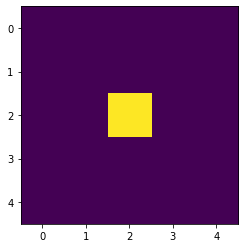

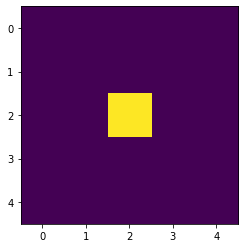

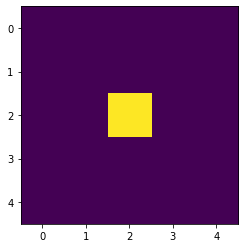

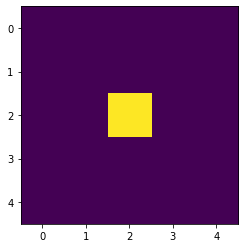

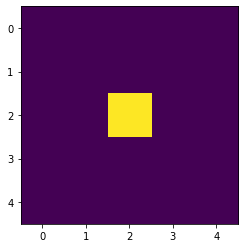

2.507780075073242


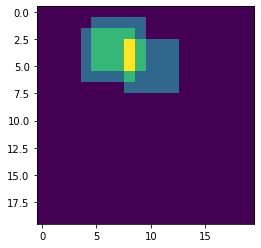

2.2.0-dev20200324
CropROI3D [TensorShape([2, 5, 30, 30, 1]), TensorShape([4, 4])]


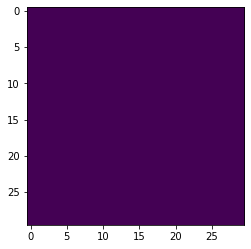

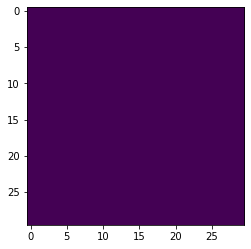

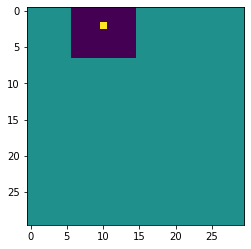

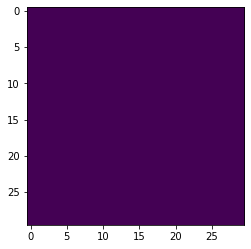

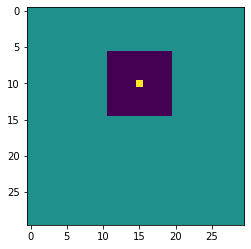

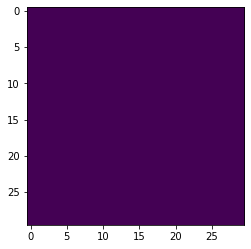

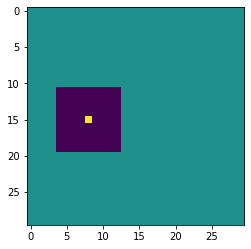

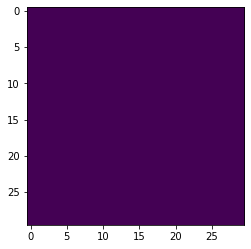

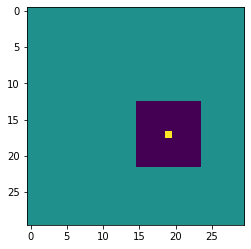

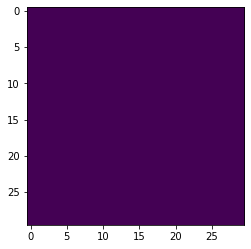

Interleave
Interleave [TensorShape([4, 100, 100, 10]), TensorShape([4, 100, 100, 20])]
(4, 100, 100, 20)
Interleave
Combine3D
Combine3D [TensorShape([4, 25, 25, 10]), TensorShape([4, 50, 50, 10]), TensorShape([4, 75, 75, 10]), TensorShape([4, 100, 100, 10])]
(4, 4, 100, 100, 10)
Combine3D
Expand3D
Expand3D (4, 4, 100, 100, 10)
(4, 8, 100, 100, 5)
Expand3D


In [6]:
import ShAReD_Net.model.layer.aggregation as aggregation
aggregation.main()

In [7]:
import ShAReD_Net.model.layer.base as layer_base
layer_base.main()

SelfShAReD
SelfShAReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 20])]
ShAReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 20])]
ResAttention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 20])]
Attention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 20])]
ShReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 60])]
DenseModule (1, 100, 100, 80)
DenseBlock (1, 100, 100, 24)
BnDoConfReluConfRelu (1, 100, 100, 24)
DenseBlock (1, 100, 100, 88)
BnDoConfReluConfRelu (1, 100, 100, 88)
Attention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 152])]
ShAReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 40])]
ResAttention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 40])]
Attention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 40])]
ShReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 60])]
DenseModule (1, 100, 100, 80)
DenseBlock (1, 100, 100, 24)
BnDoConfReluConfRelu

ResAttention [TensorShape([1, None, None, 20]), TensorShape([1, 80, 80, 20])]
Attention [TensorShape([1, None, None, 20]), TensorShape([1, 80, 80, 20])]
DenseModule (1, 80, 80, 80)
DenseBlock (1, 80, 80, 24)
BnDoConfReluConfRelu (1, 80, 80, 24)
DenseBlock (1, 80, 80, 88)
BnDoConfReluConfRelu (1, 80, 80, 88)
Scale (1, 80, 80, 152)
((<tf.Tensor: shape=(1, 100, 100, 20), dtype=float32, numpy=
array([[[[ 91.160034,  89.90283 , 125.86341 , ..., 132.47456 ,
          126.01245 , 102.99723 ],
         [ 93.658066,  88.76701 , 126.63189 , ..., 133.98941 ,
          113.338066,  98.89725 ],
         [ 94.76113 ,  88.709015, 124.34645 , ..., 133.41136 ,
          109.14718 ,  97.96722 ],
         ...,
         [ 95.578354,  88.52244 , 124.29014 , ..., 129.08125 ,
          109.888145,  99.12192 ],
         [ 95.20873 ,  88.9139  , 126.83471 , ..., 131.76031 ,
          112.249695,  99.56933 ],
         [ 92.48849 ,  89.19579 , 123.87499 , ..., 134.90596 ,
          112.1143  , 102.42853 ]],

   

Merge [TensorShape([1, 80, 80, 20]), TensorShape([1, 100, 100, 20])]
Merge (TensorShape([1, 80, 80, 20]), TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 20]))
Merge [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 20])]
(1, 80, 80, 40)
(1, 100, 100, 60)
(1, 100, 100, 40)
Mix
((<tf.Tensor: shape=(1, 100, 100, 20), dtype=float32, numpy=
array([[[[   5.332115  ,    9.662239  ,   36.670647  , ...,
            30.77565   ,   35.646034  ,   12.57476   ],
         [ -21.527954  ,  -17.78257   ,   13.929756  , ...,
             2.4289627 ,    5.9400253 ,  -20.208824  ],
         [ -34.21132   ,  -31.260239  ,    2.8831482 , ...,
           -11.228081  ,   -7.9052887 ,  -36.079697  ],
         ...,
         [ -34.382736  ,  -31.991623  ,    3.2642517 , ...,
           -11.768059  ,   -7.7982407 ,  -35.877716  ],
         [ -21.4197    ,  -20.129837  ,   15.618874  , ...,
             1.1183853 ,    3.2101822 ,  -22.306938  ],
         [   4.034851  ,    4.0174866 ,   40.434

((<tf.Tensor: shape=(1, 100, 100, 20), dtype=float32, numpy=
array([[[[145.37222 ,  83.38258 , 171.86525 , ..., 104.46274 ,
           95.1652  ,  88.93203 ],
         [146.92104 ,  83.16459 , 169.67136 , ..., 102.78341 ,
           94.18363 ,  88.87314 ],
         [149.4162  ,  82.4804  , 169.53171 , ...,  98.68601 ,
           95.49701 ,  88.06092 ],
         ...,
         [149.2606  ,  83.4641  , 170.37396 , ...,  98.17135 ,
           94.53755 ,  87.79622 ],
         [147.87762 ,  82.49297 , 171.44684 , ..., 101.21567 ,
           96.872505,  88.44376 ],
         [146.8772  ,  84.29448 , 171.41275 , ..., 103.546425,
          106.92572 ,  89.320206]],

        [[145.43298 ,  83.26012 , 171.98961 , ..., 100.88538 ,
           93.8216  ,  86.53766 ],
         [142.66446 ,  82.55255 , 170.94844 , ...,  95.46747 ,
           92.06422 ,  85.29935 ],
         [144.06657 ,  82.15337 , 173.41493 , ...,  93.94553 ,
           92.835266,  83.52901 ],
         ...,
         [143.13547 ,  83.1

tf.Tensor(
[[[1.        1.        1.        1.        1.       ]
  [1.        0.9999999 1.        1.        1.       ]
  [1.        1.        0.9999999 1.        1.       ]
  [1.        1.        1.        1.        1.       ]
  [1.        1.        1.        1.        1.       ]]

 [[1.        1.        1.        1.        1.       ]
  [1.        1.        1.        1.        1.       ]
  [1.        1.        1.        1.        1.       ]
  [1.        1.        1.        1.        1.       ]
  [1.        1.        1.        1.        1.       ]]], shape=(2, 5, 5), dtype=float32)
tf.Tensor(
[[[0.        0.        0.        0.        0.       ]
  [0.        0.9999999 0.        0.        0.       ]
  [0.        0.        0.9999999 0.        0.       ]
  [0.        0.        0.        0.        0.       ]
  [0.        0.        0.        0.        1.       ]]

 [[0.        0.        0.        0.        0.       ]
  [0.        1.        0.        0.        0.       ]
  [0.        0.      

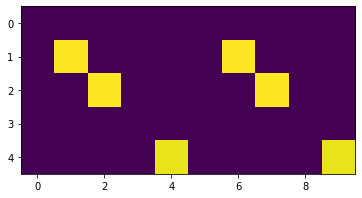

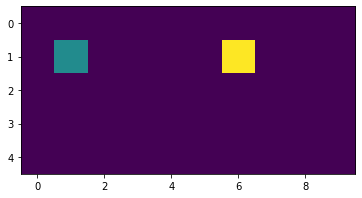

var_loss: tf.Tensor(
[[[[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [20000.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]]


 [[[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [ 7500.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]

  [[    0.]
   [    0.]
   [    0.]
   [    0.]
   [    0.]]]], shape=(2, 5, 5, 1), dtype=float32)
loc_loss: (<tf.Tensor: shape=(2, 5, 5, 1), dtype=float32, numpy=
array([[[[      0.],
         [      0.],
         [      0.],
         [      0.],
         [      0.]],

        [[      0.],
         [      0.],
         [      0.],
         [      0.],
         [      0.]],

        [[      0.],
         [      0.],

In [8]:
import ShAReD_Net.model.layer.heatmap_1d as heatmap_1d
heatmap_1d.main()

In [1]:
import ShAReD_Net.model.layer.heatmap_2d as heatmap_2d
heatmap_2d.main()

tf.Tensor(
[[1.       ]
 [1.       ]
 [1.       ]
 [1.0000002]], shape=(4, 1), dtype=float32)
LocationMap None
loc: tf.Tensor(
[[1550. 1500.]
 [1550. 1500.]
 [1500. 1400.]
 [3100. 3000.]], shape=(4, 2), dtype=float32)
indexes loc: tf.Tensor(
[[16  8]
 [16  8]
 [15  7]
 [29 14]], shape=(4, 2), dtype=int32)
indexes map: tf.Tensor(
[[16  8]
 [16  8]
 [15  7]
 [29 14]], shape=(4, 2), dtype=int32)
var_loss: tf.Tensor([ 1249.9995 51250.         0.      8750.    ], shape=(4,), dtype=float32)
loc_loss: (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.250e+03, 1.250e+03, 5.000e+03, 2.405e+06], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1249.9995, 51250.    ,     0.    ,  8750.    ], dtype=float32)>)


In [10]:
import ShAReD_Net.model.modules.feature as feature
feature.main()

Extractor
Extractor (1, 100, 100, 20)
(1, 100, 100, 32)
Extractor
FrustumScaler
FrustumScaler [TensorShape([1, 100, 100, 20]), TensorShape([]), TensorShape([])]
(1, 9, 9, 20)
(1, 18, 18, 20)
(1, 27, 27, 20)
(1, 36, 36, 20)
(1, 45, 45, 20)
(1, 55, 55, 20)
(1, 64, 64, 20)
(1, 73, 73, 20)
(1, 82, 82, 20)
(1, 91, 91, 20)
FrustumScaler
ScaledFeatures
ScaledFeatures [TensorShape([1, 100, 100, 3]), TensorShape([]), TensorShape([])]
Extractor (1, 100, 100, 3)
FrustumScaler [TensorShape([1, 100, 100, 32]), TensorShape([]), TensorShape([])]
(1, 9, 9, 32)
(1, 18, 18, 32)
(1, 27, 27, 32)
(1, 36, 36, 32)
(1, 45, 45, 32)
(1, 55, 55, 32)
(1, 64, 64, 32)
(1, 73, 73, 32)
(1, 82, 82, 32)
(1, 91, 91, 32)
ScaledFeatures
Extractor
0.11771965026855469


In [11]:
import ShAReD_Net.model.modules.base as base
base.main()

MultiscaleShAReDStage
MultiscaleShAReDStage [(TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30])), (TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 30])), (TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 30]))]
ShAReDHourGlass (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
ShAReD (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
ResAttention (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
Attention (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
ShReD [TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 60])]
DenseModule (1, 50, 50, 80)
DenseBlock (1, 50, 50, 24)
BnDoConfReluConfRelu (1, 50, 50, 24)
DenseBlock (1, 50, 50, 72)
BnDoConfReluConfRelu (1, 50, 50, 72)
ShAReD (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 120]))
ResAttention (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 120]))
Attention (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 120]))
ShReD [TensorShape([1, 50, 50, 20]),

Attention [TensorShape([1, 75, 75, 360]), TensorShape([1, 75, 75, 120])]
ShAReD [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 720])]
ResAttention [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 720])]
Attention [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 720])]
ShReD [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 60])]
DenseModule (1, 75, 75, 80)
DenseBlock (1, 75, 75, 24)
BnDoConfReluConfRelu (1, 75, 75, 24)
DenseBlock (1, 75, 75, 72)
BnDoConfReluConfRelu (1, 75, 75, 72)
SelfShAReD (TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 240]))
ShAReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 240])]
ResAttention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 240])]
Attention [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 240])]
ShReD [TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 60])]
DenseModule (1, 100, 100, 80)
DenseBlock (1, 100, 100, 24)
BnDoConfReluConfRelu (1, 100, 100, 24)
DenseBlock (1,

4.893921852111816
MultiscaleShAReD
MultiscaleShAReD [(TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30])), (TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 30])), (TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 30]))]
MultiscaleShAReDStage [(TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30])), (TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 30])), (TensorShape([1, 100, 100, 20]), TensorShape([1, 100, 100, 30]))]
ShAReDHourGlass (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
ShAReD (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
ResAttention (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
Attention (TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 30]))
ShReD [TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 60])]
DenseModule (1, 50, 50, 80)
DenseBlock (1, 50, 50, 24)
BnDoConfReluConfRelu (1, 50, 50, 24)
DenseBlock (1, 50, 50, 40)
BnDoConfReluConfRelu (1, 50, 50, 40)
DenseBlock (1, 50, 50, 56)
BnDo

DenseBlock (1, 50, 50, 40)
BnDoConfReluConfRelu (1, 50, 50, 40)
DenseBlock (1, 50, 50, 56)
BnDoConfReluConfRelu (1, 50, 50, 56)
Attention [TensorShape([1, 50, 50, 144]), TensorShape([1, 50, 50, 72])]
ShAReD [TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 288])]
ResAttention [TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 288])]
Attention [TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 288])]
ShReD [TensorShape([1, 50, 50, 20]), TensorShape([1, 50, 50, 60])]
DenseModule (1, 50, 50, 80)
DenseBlock (1, 50, 50, 24)
BnDoConfReluConfRelu (1, 50, 50, 24)
DenseBlock (1, 50, 50, 40)
BnDoConfReluConfRelu (1, 50, 50, 40)
DenseBlock (1, 50, 50, 56)
BnDoConfReluConfRelu (1, 50, 50, 56)
SelfShAReD (TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 216]))
ShAReD [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 216])]
ResAttention [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 216])]
Attention [TensorShape([1, 75, 75, 20]), TensorShape([1, 75, 75, 216])]
ShReD [T

ScaledShAReD (TensorShape([1, 50, 50, 20]), TensorShape([1, None, None, 72]))
Scale (1, 50, 50, 20)
ResAttention [TensorShape([1, None, None, 20]), TensorShape([1, None, None, 72])]
Attention [TensorShape([1, None, None, 20]), TensorShape([1, None, None, 72])]
DenseModule (1, None, None, 80)
DenseBlock (1, None, None, 24)
BnDoConfReluConfRelu (1, None, None, 24)
DenseBlock (1, None, None, 40)
BnDoConfReluConfRelu (1, None, None, 40)
DenseBlock (1, None, None, 56)
BnDoConfReluConfRelu (1, None, None, 56)
Scale (1, None, None, 72)
Scale (1, None, None, 72)
ScaledShAReD [TensorShape([1, 50, 50, 20]), TensorShape([1, None, None, 144])]
Scale (1, 50, 50, 20)
ResAttention [TensorShape([1, None, None, 20]), TensorShape([1, None, None, 144])]
Attention [TensorShape([1, None, None, 20]), TensorShape([1, None, None, 144])]
DenseModule (1, None, None, 80)
DenseBlock (1, None, None, 24)
BnDoConfReluConfRelu (1, None, None, 24)
DenseBlock (1, None, None, 40)
BnDoConfReluConfRelu (1, None, None, 40)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



10.167613744735718


In [12]:
import ShAReD_Net.model.modules.extractor as extract
extract.main()

MultiScaleFeatureExtractor
MultiScaleFeatureExtractor [TensorShape([1, 100, 100, 3]), TensorShape([]), TensorShape([])]
ScaledFeatures [TensorShape([1, 100, 100, 3]), TensorShape([]), TensorShape([])]
Extractor (1, 100, 100, 3)
FrustumScaler [TensorShape([1, 100, 100, 32]), TensorShape([]), TensorShape([])]
MultiscaleShAReD [(TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32]))]
MultiscaleShAReDStage [(TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 32])), (TensorShape([1, Non

BnDoConfReluConfRelu (1, None, None, 24)
DenseBlock (1, None, None, 40)
BnDoConfReluConfRelu (1, None, None, 40)
DenseBlock (1, None, None, 56)
BnDoConfReluConfRelu (1, None, None, 56)
Mix [TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72])]
Merge [TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72])]
Merge (TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]))
Merge (TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]))
Merge (TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72]))
Merge [TensorShape([1, None, None, 72]), TensorShape([1, None, None, 72])]
SelfShAReD (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 144]))
ShAReD [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 144])]
ResAt

DenseBlock (1, None, None, 56)
BnDoConfReluConfRelu (1, None, None, 56)
ShAReD (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 72]))
ResAttention (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 72]))
Attention (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 72]))
ShReD [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 96])]
DenseModule (1, None, None, 128)
DenseBlock (1, None, None, 24)
BnDoConfReluConfRelu (1, None, None, 24)
DenseBlock (1, None, None, 40)
BnDoConfReluConfRelu (1, None, None, 40)
DenseBlock (1, None, None, 56)
BnDoConfReluConfRelu (1, None, None, 56)
Scale (1, None, None, 72)
ScaledShAReD [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 72])]
Scale (1, None, None, 32)
ResAttention [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 72])]
Attention [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 72])]
DenseModule (1, None, None, 128)
DenseBlock (1, None, None, 24)
BnDoConf

ResAttention [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 288])]
Attention [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 288])]
ShReD [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 96])]
DenseModule (1, None, None, 128)
DenseBlock (1, None, None, 24)
BnDoConfReluConfRelu (1, None, None, 24)
DenseBlock (1, None, None, 40)
BnDoConfReluConfRelu (1, None, None, 40)
DenseBlock (1, None, None, 56)
BnDoConfReluConfRelu (1, None, None, 56)
SelfShAReD (TensorShape([1, None, None, 32]), TensorShape([1, None, None, 216]))
ShAReD [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 216])]
ResAttention [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 216])]
Attention [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 216])]
ShReD [TensorShape([1, None, None, 32]), TensorShape([1, None, None, 96])]
DenseModule (1, None, None, 128)
DenseBlock (1, None, None, 24)
BnDoConfReluConfRelu (1, None, None, 24)
DenseBlock (

In [13]:
import ShAReD_Net.model.modules.detector as detector
detector.main()

PersonDetector
PersonDetector (4, 5, 100, 100, 10)
Expand3D (4, 5, 100, 100, 10)
5606
(4, 100, 100, 10)
PersonDetector
0.42681312561035156


In [14]:
import ShAReD_Net.model.modules.estimator as estimator
estimator.main()

PoseEstimator
PoseEstimator (1, 100, 100, 3)
SelfShAReD [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 3])]
ShAReD [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 3])]
ResAttention [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 3])]
Attention [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 3])]
ShReD [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 9])]
DenseModule (1, 100, 100, 12)
DenseBlock (1, 100, 100, 24)
BnDoConfReluConfRelu (1, 100, 100, 24)
DenseBlock (1, 100, 100, 56)
BnDoConfReluConfRelu (1, 100, 100, 56)
DenseBlock (1, 100, 100, 88)
BnDoConfReluConfRelu (1, 100, 100, 88)
DenseBlock (1, 100, 100, 120)
BnDoConfReluConfRelu (1, 100, 100, 120)
Attention [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 152])]
ShAReD [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 6])]
ResAttention [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 6])]
Attention [TensorShape([1, 100, 100, 3]), TensorShape([1, 100, 100, 

In [3]:
import ShAReD_Net.training.run_train_train_model as run_train_model
run_train_model.main()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]
0
0
12
12
3 Physical GPUs, 3 Logical GPUs
physical_devs [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:2', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:3', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2'

ResAttention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 40])]
Attention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 40])]
DenseModule (None, None, None, 128)
DenseBlock (None, None, None, 24)
BnDoConfReluConfRelu (None, None, None, 24)
DenseBlock (None, None, None, 32)
BnDoConfReluConfRelu (None, None, None, 32)
Scale (None, None, None, 40)
Scale (None, None, None, 40)
ScaledShAReD [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80])]
Scale (None, None, None, 32)
ResAttention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80])]
Attention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80])]
DenseModule (None, None, None, 128)
DenseBlock (None, None, None, 24)
BnDoConfReluConfRelu (None, None, None, 24)
DenseBlock (None, None, None, 32)
BnDoConfReluConfRelu (None, None, None, 32)
Scale (None, None, None, 40)
ScaledShAReD (TensorShape([None, None, None, 32]), TensorShape([No

Attention [TensorShape([None, None, None, 80]), TensorShape([None, None, None, 40])]
ShAReD [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 160])]
ResAttention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 160])]
Attention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 160])]
ShReD [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 96])]
DenseModule (None, None, None, 128)
DenseBlock (None, None, None, 24)
BnDoConfReluConfRelu (None, None, None, 24)
DenseBlock (None, None, None, 32)
BnDoConfReluConfRelu (None, None, None, 32)
stage using /device:GPU:1
MultiscaleShAReDStage [(TensorShape([None, None, None, 32]), TensorShape([None, None, None, 40])), (TensorShape([None, None, None, 32]), TensorShape([None, None, None, 40])), (TensorShape([None, None, None, 32]), TensorShape([None, None, None, 40])), (TensorShape([None, None, None, 32]), TensorShape([None, None, None, 40])), (TensorShape([None, None, None,

Merge (TensorShape([None, None, None, 40]), TensorShape([None, None, None, 40]), TensorShape([None, None, None, 40]))
Merge (TensorShape([None, None, None, 40]), TensorShape([None, None, None, 40]), TensorShape([None, None, None, 40]))
Merge [TensorShape([None, None, None, 40]), TensorShape([None, None, None, 40])]
SelfShAReD (TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80]))
ShAReD [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80])]
ResAttention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80])]
Attention [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 80])]
ShReD [TensorShape([None, None, None, 32]), TensorShape([None, None, None, 96])]
DenseModule (None, None, None, 128)
DenseBlock (None, None, None, 24)
BnDoConfReluConfRelu (None, None, None, 24)
DenseBlock (None, None, None, 32)
BnDoConfReluConfRelu (None, None, None, 32)
Attention [TensorShape([None, None, None, 80]), TensorShape([None, No

DenseBlock (None, 11, 11, 40)
BnDoConfReluConfRelu (None, 11, 11, 40)
DenseBlock (None, 11, 11, 48)
BnDoConfReluConfRelu (None, 11, 11, 48)
Scale (None, 11, 11, 56)
Scale (None, 11, 11, 32)
ShAReD [TensorShape([None, 13, 13, 37]), TensorShape([None, 13, 13, 75])]
ResAttention [TensorShape([None, 13, 13, 37]), TensorShape([None, 13, 13, 75])]
Attention [TensorShape([None, 13, 13, 37]), TensorShape([None, 13, 13, 75])]
ShReD [TensorShape([None, 13, 13, 37]), TensorShape([None, 13, 13, 111])]
DenseModule (None, 13, 13, 148)
DenseBlock (None, 13, 13, 24)
BnDoConfReluConfRelu (None, 13, 13, 24)
DenseBlock (None, 13, 13, 32)
BnDoConfReluConfRelu (None, 13, 13, 32)
DenseBlock (None, 13, 13, 40)
BnDoConfReluConfRelu (None, 13, 13, 40)
DenseBlock (None, 13, 13, 48)
BnDoConfReluConfRelu (None, 13, 13, 48)
SelfShAReD (TensorShape([None, 13, 13, 37]), TensorShape([None, 13, 13, 56]))
ShAReD [TensorShape([None, 13, 13, 37]), TensorShape([None, 13, 13, 56])]
ResAttention [TensorShape([None, 13, 13, 

capped_gradients [('colors/kernel:0', [[[[nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]]]]),
 ('colors/bias:0', [nan nan nan ... nan nan nan]),
 ('textures/depthwise_kernel:0', [[[[nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   ...
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]]

  [[nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   ...
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]]

  [[nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   ...
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]]]


 [[[nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   [nan nan nan ... nan nan nan]
   ...
   [nan nan nan ... nan nan nan]
   [nan nan 

Step: 1
used img scale [15 15]
used img scale [89 89]
used img scale [162 162]
used img scale [236 236]
used img scale [310 310]
loss [[[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 ...

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]] [[[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 ...

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]


capped_gradients [('colors/kernel:0', [[[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]]),
 ('colors/bias:0', [0 0 0 ... 0 0 0]),
 ('textures/depthwise_kernel:0', [[[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 

Step: 2
END?


In [ ]:
import ShAReD_Net.training.loss.base as loss_base
loss_base.main()

In [ ]:
import ShAReD_Net.training.model as train_model
train_model.main()

In [ ]:
import ShAReD_Net.training.train as train
train.main()

In [ ]:
import ShAReD_Net.training.run_train as run_train
run_train.main()

In [ ]:
import tensorflow as tf

@tf.function
def run(tensor):
    tf.TensorArray(dtype=tf.float32, size=tf.cast(tensor, dtype = tf.float32), dynamic_size=False)

v = tf.Variable(5,dtype=tf.float32)
run(v)